### importing all Liabrary

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

In [31]:
# Read the csv file and create Data Frame 
df=pd.read_csv(r'Privacy-Preserving.csv')


### EDA

In [32]:
# view the top 5 rows
df.head()

,activity_description,label,duration_minutes,user_id
0,Reviewing course lecture slides,Utilizing Time for Knowledge Development,92,54
1,Playing a video game,Utilizing Time for Knowledge Development,73,91
2,Playing a video game,Utilizing Time for Knowledge Development,91,55
3,Watching Khan Academy math tutorial,Utilizing Time for Knowledge Development,45,11
4,Watching TV shows,Wasting Time,11,68


In [5]:
# view the last 5 rows
df.tail()

,activity_description,label,duration_minutes,user_id
4995,Chatting with friends on messaging apps,Utilizing Time for Knowledge Development,116,32
4996,Writing an essay for a class assignment,Wasting Time,38,40
4997,Reviewing course lecture slides,Utilizing Time for Knowledge Development,12,30
4998,Playing online crossword puzzles,Utilizing Time for Knowledge Development,77,95
4999,Watching TV shows,Utilizing Time for Knowledge Development,59,94


In [6]:
# Cheking the Information of each columns like Data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   activity_description  5000 non-null   object
 1   label                 5000 non-null   object
 2   duration_minutes      5000 non-null   int64 
 3   user_id               5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


In [7]:
# Cheking the null value in dataset
df.isna().sum()

activity_description    0
label                   0
duration_minutes        0
user_id                 0
dtype: int64

In [8]:
# Cheking the Data Set shape (Rows, columns)
df.shape

(5000, 4)

In [9]:
# cheking columns name in data set
df.columns

Index(['activity_description', 'label', 'duration_minutes', 'user_id'], dtype='object')

In [10]:
# cheking types of data present in specific columns 
df['label'].value_counts().to_dict()

{'Utilizing Time for Knowledge Development': 3447, 'Wasting Time': 1553}

In [11]:
# Replace that Categorical data into integer data.
df['label'].replace({'Utilizing Time for Knowledge Development': 0, 'Wasting Time': 1},inplace=True)

In [12]:
# cheking types of data present in specific columns 
df['activity_description'].value_counts().to_dict()

{'Participating in a group discussion on the course forum': 296,
 'Watching Khan Academy math tutorial': 284,
 'Coding a personal project': 278,
 'Reviewing course lecture slides': 274,
 'Checking email': 272,
 'Listening to an audiobook on a relevant topic': 272,
 'Playing online crossword puzzles': 271,
 'Writing an essay for a class assignment': 271,
 'Chatting with friends on messaging apps': 269,
 'Watching TV shows': 265,
 'Reading a scientific research paper': 263,
 'Taking notes from a lecture video': 257,
 'Browsing Wikipedia for history facts': 256,
 'Scrolling through social media feeds': 254,
 'Watching cat videos on YouTube': 251,
 'Participating in an online quiz': 248,
 'Solving programming exercises': 243,
 'Playing a video game': 242,
 'Online shopping': 234}

In [13]:
# Replace that Categorical data into integer data.
df['activity_description'].replace({'Participating in a group discussion on the course forum': 0,
 'Watching Khan Academy math tutorial': 1,
 'Coding a personal project': 2,
 'Reviewing course lecture slides': 3,
 'Checking email': 4,
 'Listening to an audiobook on a relevant topic': 5,
 'Playing online crossword puzzles': 6,
 'Writing an essay for a class assignment': 7,
 'Chatting with friends on messaging apps': 8,
 'Watching TV shows': 9,
 'Reading a scientific research paper': 10,
 'Taking notes from a lecture video': 11,
 'Browsing Wikipedia for history facts': 12,
 'Scrolling through social media feeds': 13,
 'Watching cat videos on YouTube': 14,
 'Participating in an online quiz': 15,
 'Solving programming exercises': 16,
 'Playing a video game': 17,
 'Online shopping': 18},inplace=True)

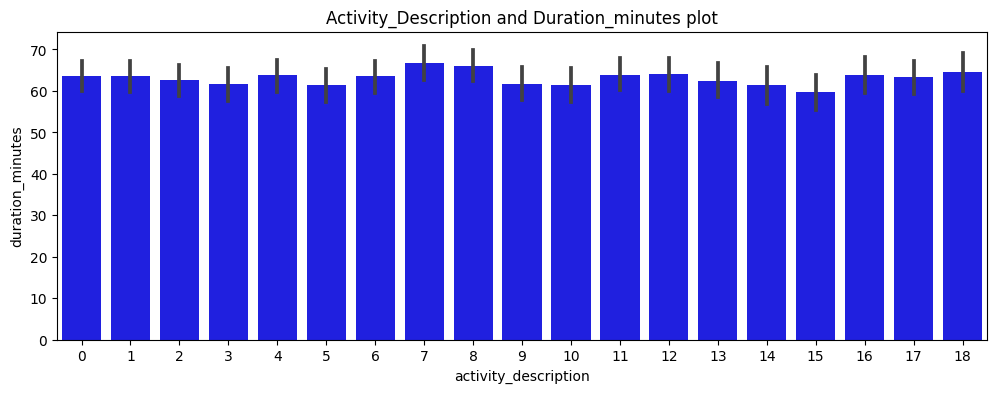

In [14]:
# bar plot 
plt.figure(figsize=(12,4))
sns.barplot(x=df['activity_description'],y=df['duration_minutes'],color='blue')
plt.title('Activity_Description and Duration_minutes plot')
plt.show()

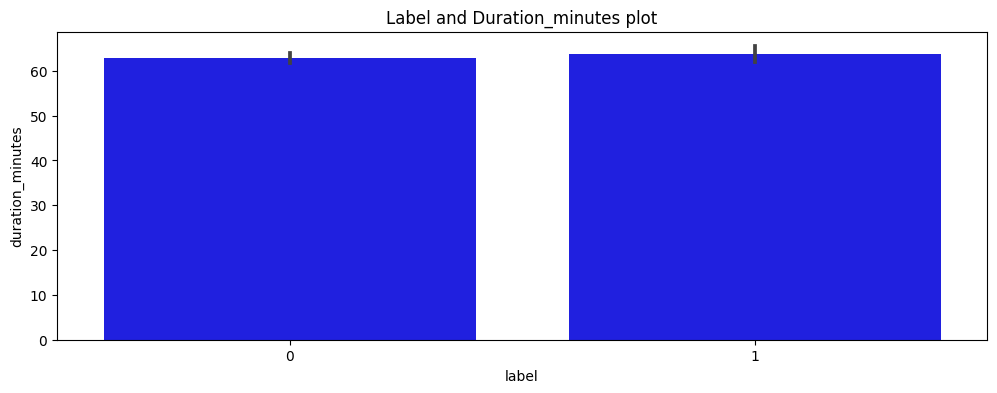

In [15]:
# bar plot 
plt.figure(figsize=(12,4))
sns.barplot(x=df['label'],y=df['duration_minutes'],color='blue')
plt.title('Label and Duration_minutes plot')
plt.show()

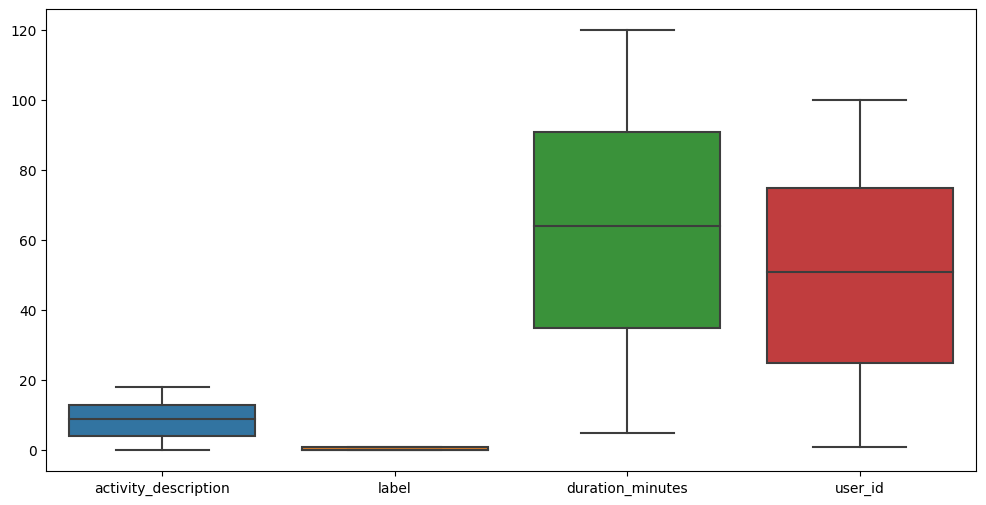

In [16]:
# Box Plot it will use to check the outlier present in our dataset
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

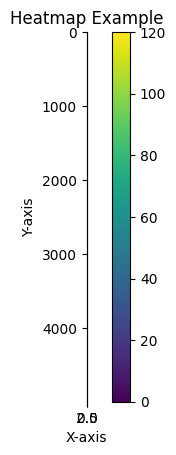

In [17]:
# Create a heatmap
plt.imshow(df, cmap='viridis', interpolation='nearest')
plt.colorbar()

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap Example')

# Show the plot
plt.show()


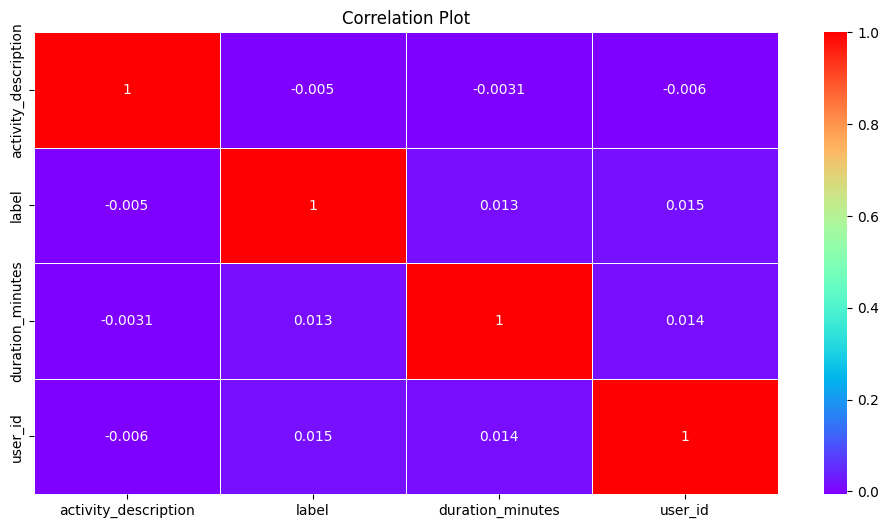

In [18]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Figure
plt.figure(figsize=(12,6))
# Create a heatmap of the correlation matrix using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', linewidths=.5)

# Add title
plt.title('Correlation Plot')

# Show the plot
plt.show()

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

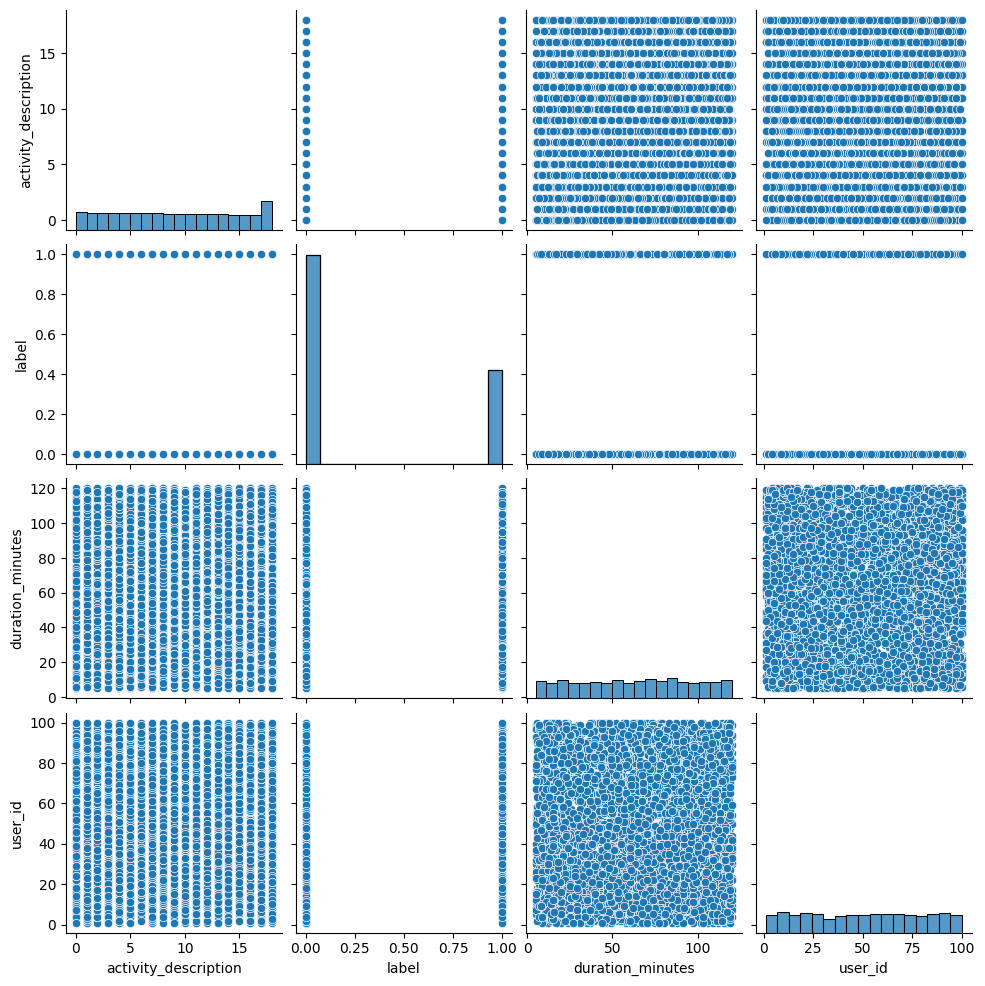

In [19]:
# pair plot

plt.figure(figsize=(10,10))

sns.pairplot(df)

plt.show()

c:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

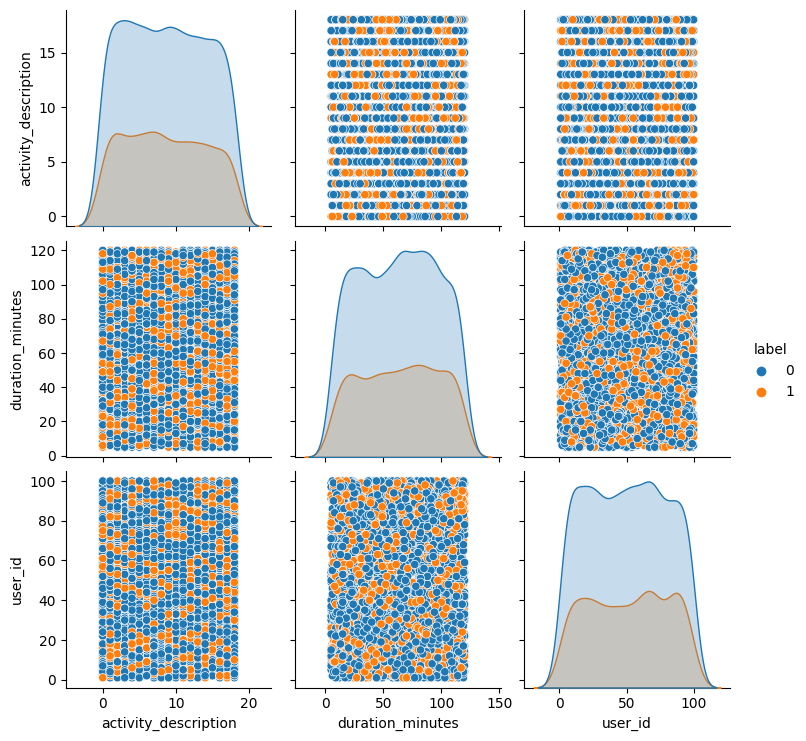

In [20]:
# pair plot

plt.figure(figsize=(10,10))

sns.pairplot(df,hue='label')

plt.show()

### Splitting the Data

In [21]:
df.head()

,activity_description,label,duration_minutes,user_id
0,3,0,92,54
1,17,0,73,91
2,17,0,91,55
3,1,0,45,11
4,9,1,11,68


In [22]:
# x = dependent columns and y =  Independent or target column
# we remove the ID because its not importance

df.drop('user_id',axis=1,inplace=True)
df.head()

,activity_description,label,duration_minutes
0,3,0,92
1,17,0,73
2,17,0,91
3,1,0,45
4,9,1,11


In [23]:
x=df.drop('label',axis=1)
y=df['label']

In [24]:
x.head()

,activity_description,duration_minutes
0,3,92
1,17,73
2,17,91
3,1,45
4,9,11


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3500, 2), (1500, 2), (3500,), (1500,))

### Model Training

### Decision Tree  

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
### Traning accuracy for DT
y_pred=model_dt.predict(x_train)
acc_dt_train = accuracy_score(y_train,y_pred)
RS_dt_train = recall_score(y_train,y_pred)
PS_dt_train = precision_score(y_train,y_pred)
F1S_dt_train = f1_score(y_train,y_pred)
CM_dt_train = confusion_matrix(y_train,y_pred)
print(f'accuracy_dt = ',acc_dt_train)
print(f'Recall = ',RS_dt_train)
print(f'Precision = ',PS_dt_train)
print(f'F1-score = ',F1S_dt_train)
print(f'Condusion-Metrics = \n',CM_dt_train)

accuracy_dt =  0.8237142857142857
Recall =  0.5188592456301748
Precision =  0.8571428571428571
F1-score =  0.6464183381088825
Condusion-Metrics = 
 [[2319   94]
 [ 523  564]]


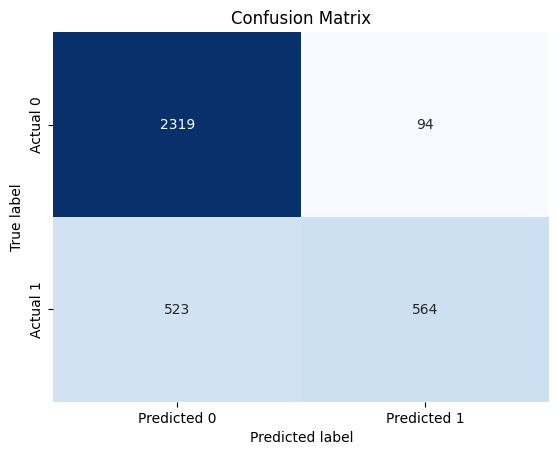

In [37]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_dt_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [38]:
### Testing accuracy for DT
y_pred_test=model_dt.predict(x_test)
acc_dt_test = accuracy_score(y_test,y_pred_test)
RS_dt_test = recall_score(y_test,y_pred_test)
PS_dt_test = precision_score(y_test,y_pred_test)
F1S_dt_test = f1_score(y_test,y_pred_test)
CM_dt_test = confusion_matrix(y_test,y_pred_test)
print(f'accuracy_dt = ',acc_dt_test)
print(f'Recall = ',RS_dt_test)
print(f'Precision = ',PS_dt_test)
print(f'F1-score = ',F1S_dt_test)

accuracy_dt =  0.592
Recall =  0.20815450643776823
Precision =  0.2852941176470588
F1-score =  0.24069478908188582


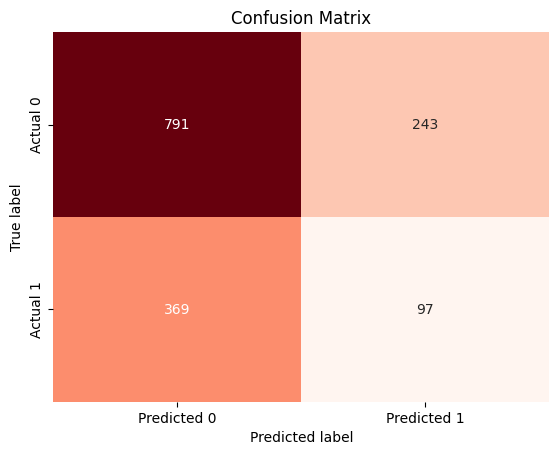

In [39]:
# Plot the confusion matrix using Seaborn for testing Data
sns.heatmap(CM_dt_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### CNN

In [40]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Build a simple fully connected neural network model
model_cnn = Sequential()
model_cnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_train, y_train)
print(f'Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}')

Epoch 1/10
110/110 [==============================] - 2s 4ms/step - loss: 0.6293 - accuracy: 0.6894 - val_loss: 0.6225 - val_accuracy: 0.6893
Epoch 2/10
110/110 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.6894 - val_loss: 0.6242 - val_accuracy: 0.6893
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6894 - val_loss: 0.6238 - val_accuracy: 0.6893
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6894 - val_loss: 0.6210 - val_accuracy: 0.6893
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6894 - val_loss: 0.6241 - val_accuracy: 0.6893
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6894 - val_loss: 0.6277 - val_accuracy: 0.6893
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.6894 - val_loss: 0.6190 - val_accuracy: 0.6893
Epoch 

In [41]:
### Traning accuracy for CNN
y_pred=model_cnn.predict(X_train)
# Assuming y_train and y_pred are continuous values
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate classification metrics
acc_cnn_train = accuracy_score(y_train,y_pred_binary)
RS_cnn_train = recall_score(y_train,y_pred_binary)
PS_cnn_train = precision_score(y_train,y_pred_binary)
F1S_cnn_train = f1_score(y_train,y_pred_binary)
CM_cnn_train = confusion_matrix(y_train,y_pred_binary)
print(f'accuracy_CNN = ',acc_cnn_train)
print(f'Recall = ',RS_cnn_train)
print(f'Precision = ',PS_cnn_train)
print(f'F1-score = ',F1S_cnn_train)
print(f'Condusion-Metrics = \n',CM_cnn_train)


110/110 [==============================] - 0s 1ms/step
accuracy_CNN =  0.6894285714285714
Recall =  0.0
Precision =  0.0
F1-score =  0.0
Condusion-Metrics = 
 [[2413    0]
 [1087    0]]


c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


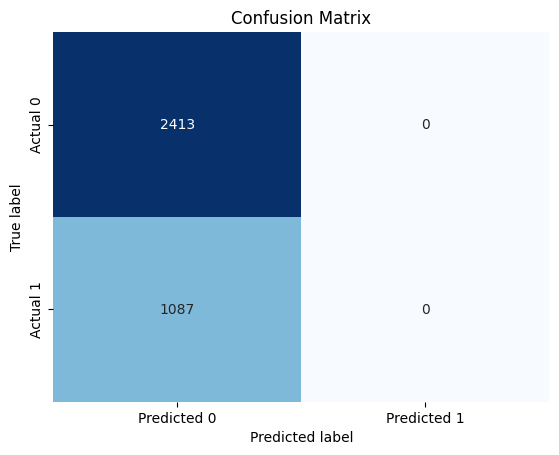

In [42]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_cnn_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [43]:
with open('CNN_model.pkl','wb') as fp:
    pickle.dump(model_cnn,fp)

In [44]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Build a simple fully connected neural network model
model_cnn = Sequential()
model_cnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10
110/110 [==============================] - 2s 6ms/step - loss: 0.6346 - accuracy: 0.6863 - val_loss: 0.6223 - val_accuracy: 0.6893
Epoch 2/10
110/110 [==============================] - 0s 4ms/step - loss: 0.6246 - accuracy: 0.6894 - val_loss: 0.6262 - val_accuracy: 0.6893
Epoch 3/10
110/110 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6894 - val_loss: 0.6207 - val_accuracy: 0.6893
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6894 - val_loss: 0.6248 - val_accuracy: 0.6893
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6894 - val_loss: 0.6237 - val_accuracy: 0.6893
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6894 - val_loss: 0.6218 - val_accuracy: 0.6893
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6894 - val_loss: 0.6237 - val_accuracy: 0.6893
Epoch 

In [45]:
### Testing accuracy for CNN
y_pred_test=model_cnn.predict(X_test)
# Assuming y_test and y_pred are continuous values
threshold = 0.5
y_pred_binary = (y_pred_test > threshold).astype(int)

# Calculate classification metrics
acc_cnn_test = accuracy_score(y_test,y_pred_binary)
RS_cnn_test = recall_score(y_test,y_pred_binary)
PS_cnn_test = precision_score(y_test,y_pred_binary)
F1S_cnn_test = f1_score(y_test,y_pred_binary)
CM_cnn_test = confusion_matrix(y_test,y_pred_binary)
print(f'accuracy_CNN = ',acc_cnn_test)
print(f'Recall = ',RS_cnn_test)
print(f'Precision = ',PS_cnn_test)
print(f'F1-score = ',F1S_cnn_test)
print(f'Condusion-Metrics = \n',CM_cnn_test)

47/47 [==============================] - 0s 1ms/step
accuracy_CNN =  0.6893333333333334
Recall =  0.0
Precision =  0.0
F1-score =  0.0
Condusion-Metrics = 
 [[1034    0]
 [ 466    0]]


c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


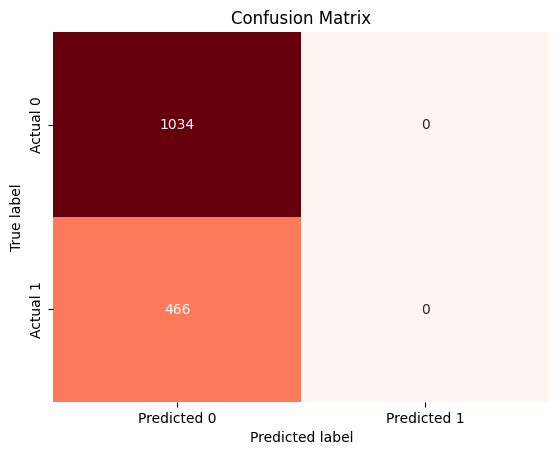

In [46]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_cnn_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Linear Discriminant Analysis [LDA]

In [47]:
model_lda=LinearDiscriminantAnalysis()
model_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [48]:
# Claclulate Y_pred
y_pred=model_lda.predict(x_train)
print(y_pred)

# Calculate classification metrics
acc_lda_train = accuracy_score(y_train,y_pred)
RS_lda_train = recall_score(y_train,y_pred)
PS_lda_train = precision_score(y_train,y_pred)
F1S_lda_train = f1_score(y_train,y_pred)
CM_lda_train = confusion_matrix(y_train,y_pred)
print(f'accuracy_lda = ',acc_lda_train)
print(f'Recall = ',RS_lda_train)
print(f'Precision = ',PS_lda_train)
print(f'F1-score = ',F1S_lda_train)
print(f'Condusion-Metrics = \n',CM_lda_train)

[0 0 0 ... 0 0 0]
accuracy_lda =  0.6894285714285714
Recall =  0.0
Precision =  0.0
F1-score =  0.0
Condusion-Metrics = 
 [[2413    0]
 [1087    0]]


c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


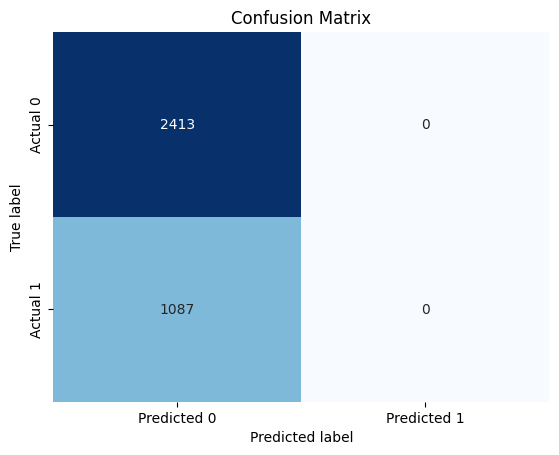

In [49]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_lda_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [50]:
### Testing accuracy for LDA

# Calculate y_pred
y_pred_test=model_lda.predict(x_test)
print(y_pred_test)

# Calculate classification metrics
acc_lda_test = accuracy_score(y_test,y_pred_test)
RS_lda_test = recall_score(y_test,y_pred_test)
PS_lda_test = precision_score(y_test,y_pred_test)
F1S_lda_test = f1_score(y_test,y_pred_test)
CM_lda_test = confusion_matrix(y_test,y_pred_test)
print(f'accuracy_lda = ',acc_lda_test)
print(f'Recall = ',RS_lda_test)
print(f'Precision = ',PS_lda_test)
print(f'F1-score = ',F1S_lda_test)

[0 0 0 ... 0 0 0]
accuracy_lda =  0.6893333333333334
Recall =  0.0
Precision =  0.0
F1-score =  0.0


c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


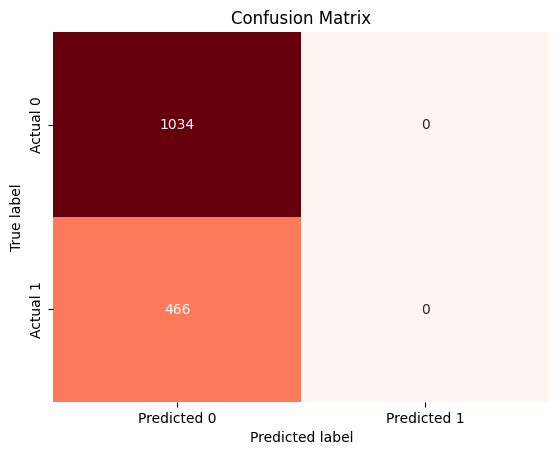

In [51]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_lda_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

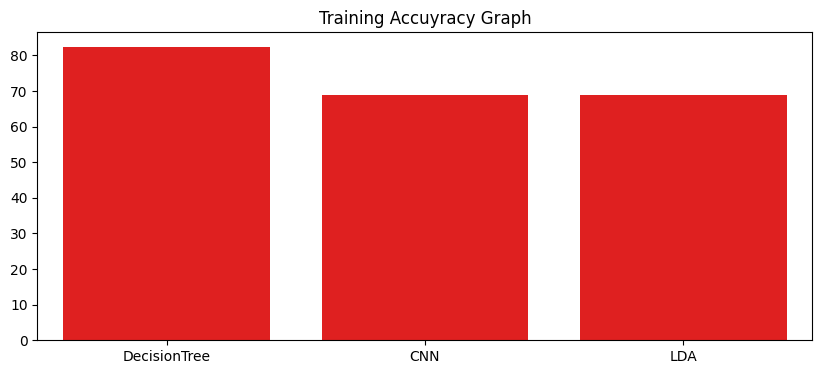

In [52]:
algorithum=["DecisionTree","CNN","LDA"]
accuracy= [acc_dt_train*100,acc_cnn_train*100,acc_lda_train*100]
plt.figure(figsize=(10,4))
sns.barplot(x=algorithum,y=accuracy,color='red')
plt.title("Training Accuyracy Graph")
plt.show()


### After Balancing the Data By using SMOTE

In [161]:
x.head()

,activity_description,duration_minutes
0,3,92
1,17,73
2,17,91
3,1,45
4,9,11


In [162]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [163]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(x, y)

In [166]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=1, stratify=Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((4825, 2), (2069, 2), (4825,), (2069,))

### Deision Tree For SMOTE

In [167]:
model_dt1=DecisionTreeClassifier()
model_dt1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [172]:
# Traning accuracy for DT
y_pred=model_dt1.predict(X_train)
print(y_pred)
# Calculate classification metrics
acc_dt1_train = accuracy_score(Y_train,y_pred)
RS_dt1_train = recall_score(Y_train,y_pred)
PS_dt1_train = precision_score(Y_train,y_pred)
F1S_dt1_train = f1_score(Y_train,y_pred)
CM_dt1_train = confusion_matrix(Y_train,y_pred)
print(f'accuracy_dt1 = ',acc_dt1_train)
print(f'Recall = ',RS_dt1_train)
print(f'Precision = ',PS_dt1_train)
print(f'F1-score = ',F1S_dt1_train)
print(f'Condusion-Metrics = \n',CM_dt1_train)

[0 1 0 ... 0 1 0]
accuracy_dt1 =  0.7991709844559586
Recall =  0.7740464344941956
Precision =  0.8149279790484505
F1-score =  0.7939613012970443
Condusion-Metrics = 
 [[1989  424]
 [ 545 1867]]


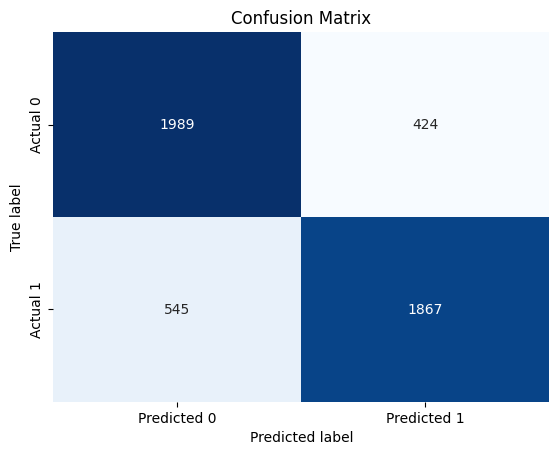

In [173]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_dt1_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [178]:
### Testing accuracy for DT
y_pred_test=model_dt1.predict(X_test)
print(y_pred_test)

# Calculate classification metrics
acc_dt1_test = accuracy_score(Y_test,y_pred_test)
RS_dt1_test = recall_score(Y_test,y_pred_test)
PS_dt1_test = precision_score(Y_test,y_pred_test)
F1S_dt1_test = f1_score(Y_test,y_pred_test)
CM_dt1_test = confusion_matrix(Y_test,y_pred_test)
print(f'accuracy_dt1 = ',acc_dt1_test)
print(f'Recall = ',RS_dt1_test)
print(f'Precision = ',PS_dt1_test)
print(f'F1-score = ',F1S_dt1_test)
print(f'CM = \n',CM_dt1_test)

[1 0 1 ... 1 0 0]
accuracy_dt1 =  0.6196230062832286
Recall =  0.6309178743961352
Precision =  0.6172022684310019
F1-score =  0.6239847109412328
CM = 
 [[629 405]
 [382 653]]


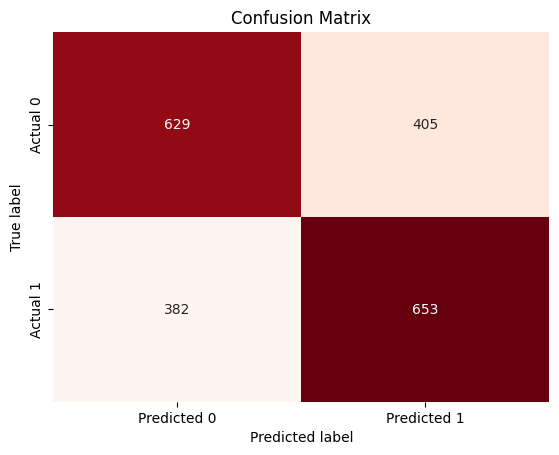

In [179]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_dt1_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Linear Discriminant Analysis [LDA] SMOTE

In [180]:
model_lda1=LinearDiscriminantAnalysis()
model_lda1.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [181]:
# Claclulate Y_pred
y_pred=model_lda1.predict(X_train)
print(y_pred)

# Calculate classification metrics
acc_lda1_train = accuracy_score(Y_train,y_pred)
RS_lda1_train = recall_score(Y_train,y_pred)
PS_lda1_train = precision_score(Y_train,y_pred)
F1S_lda1_train = f1_score(Y_train,y_pred)
CM_lda1_train = confusion_matrix(Y_train,y_pred)
print(f'accuracy_lda1 = ',acc_lda1_train)
print(f'Recall = ',RS_lda1_train)
print(f'Precision = ',PS_lda1_train)
print(f'F1-score = ',F1S_lda1_train)
print(f'Condusion-Metrics = \n',CM_lda1_train)

[1 1 1 ... 0 0 0]
accuracy_lda1 =  0.5123316062176165
Recall =  0.5169983416252073
Precision =  0.5121149897330596
F1-score =  0.5145450794305757
Condusion-Metrics = 
 [[1225 1188]
 [1165 1247]]


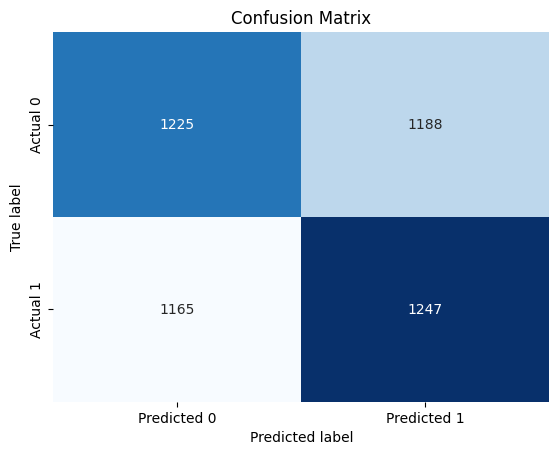

In [182]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_lda1_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [183]:
### Testing accuracy for LDA

# Calculate y_pred
y_pred_test=model_lda.predict(X_test)
print(y_pred_test)

# Calculate classification metrics
acc_lda1_test = accuracy_score(Y_test,y_pred_test)
RS_lda1_test = recall_score(Y_test,y_pred_test)
PS_lda1_test = precision_score(Y_test,y_pred_test)
F1S_lda1_test = f1_score(Y_test,y_pred_test)
CM_lda1_test = confusion_matrix(Y_test,y_pred_test)
print(f'accuracy_lda1 = ',acc_lda1_test)
print(f'Recall = ',RS_lda1_test)
print(f'Precision = ',PS_lda1_test)
print(f'F1-score = ',F1S_lda1_test)
print(f'CM  = \n',CM_lda1_test)

[0 0 0 ... 0 0 0]
accuracy_lda1 =  0.49975833736104397
Recall =  0.0
Precision =  0.0
F1-score =  0.0
CM  = 
 [[1034    0]
 [1035    0]]


c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


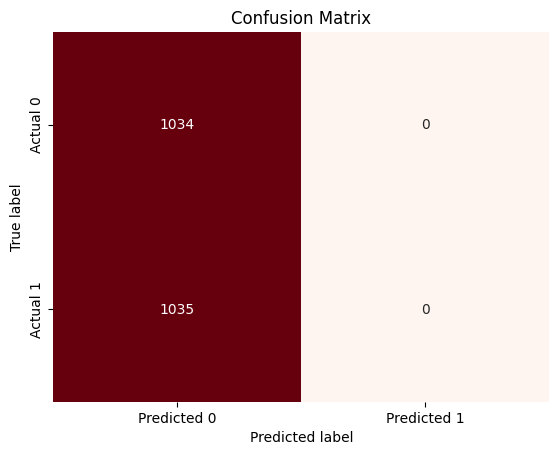

In [184]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_lda1_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### CNN for SMOTE

In [186]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple fully connected neural network model
model_cnn1 = Sequential()
model_cnn1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_cnn1.add(Dense(32, activation='relu'))
model_cnn1.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn1.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model_cnn1.evaluate(X_train, Y_train)
print(f'Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}')

Epoch 1/10
151/151 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 2/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5085
Epoch 3/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5142 - val_loss: 0.6941 - val_accuracy: 0.4978
Epoch 4/10
151/151 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5061 - val_loss: 0.6941 - val_accuracy: 0.4944
Epoch 5/10
151/151 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6939 - val_accuracy: 0.4993
Epoch 6/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5094 - val_loss: 0.6929 - val_accuracy: 0.5080
Epoch 7/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.5138
Epoch 

In [190]:
### Traning accuracy for CNN
y_pred=model_cnn1.predict(X_train)
# Assuming y_train and y_pred are continuous values
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate classification metrics
acc_cnn1_train = accuracy_score(Y_train,y_pred_binary)
RS_cnn1_train = recall_score(Y_train,y_pred_binary)
PS_cnn1_train = precision_score(Y_train,y_pred_binary)
F1S_cnn1_train = f1_score(Y_train,y_pred_binary)
CM_cnn1_train = confusion_matrix(Y_train,y_pred_binary)
print(f'accuracy_CNN1 = ',acc_cnn1_train)
print(f'Recall = ',RS_cnn1_train)
print(f'Precision = ',PS_cnn1_train)
print(f'F1-score = ',F1S_cnn1_train)
print(f'Condusion-Metrics = \n',CM_cnn1_train)

151/151 [==============================] - 0s 1ms/step
accuracy_CNN1 =  0.5206217616580311
Recall =  0.7591210613598673
Precision =  0.5138927869772664
F1-score =  0.612887029288703
Condusion-Metrics = 
 [[ 681 1732]
 [ 581 1831]]


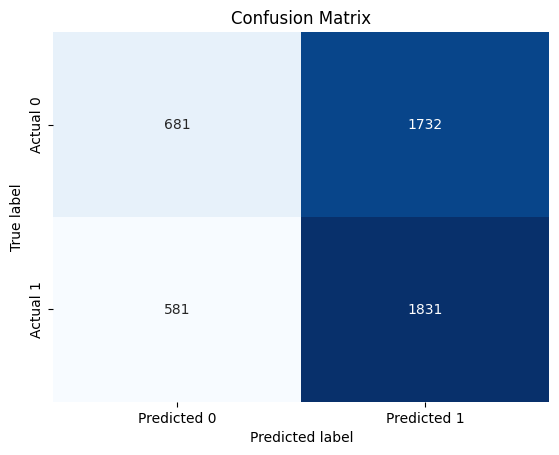

In [191]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_cnn1_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [192]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple fully connected neural network model
model_cnn1 = Sequential()
model_cnn1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_cnn1.add(Dense(32, activation='relu'))
model_cnn1.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn1.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model_cnn1.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10


151/151 [==============================] - 2s 4ms/step - loss: 0.6948 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 2/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5098 - val_loss: 0.6950 - val_accuracy: 0.5002
Epoch 3/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5127 - val_loss: 0.6933 - val_accuracy: 0.5007
Epoch 4/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5059 - val_loss: 0.6935 - val_accuracy: 0.5109
Epoch 5/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5056
Epoch 6/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5127 - val_loss: 0.6936 - val_accuracy: 0.5147
Epoch 7/10
151/151 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5167 - val_loss: 0.6935 - val_accuracy: 0.5012
Epoch 8/10
151/15

In [193]:
### Testing accuracy for CNN
y_pred_test=model_cnn.predict(X_test)
# Assuming y_test and y_pred are continuous values
threshold = 0.5
y_pred_binary = (y_pred_test > threshold).astype(int)

# Calculate classification metrics
acc_cnn1_test = accuracy_score(Y_test,y_pred_binary)
RS_cnn1_test = recall_score(Y_test,y_pred_binary)
PS_cnn1_test = precision_score(Y_test,y_pred_binary)
F1S_cnn1_test = f1_score(Y_test,y_pred_binary)
CM_cnn1_test = confusion_matrix(Y_test,y_pred_binary)
print(f'accuracy_CNN1 = ',acc_cnn1_test)
print(f'Recall = ',RS_cnn1_test)
print(f'Precision = ',PS_cnn1_test)
print(f'F1-score = ',F1S_cnn1_test)
print(f'Condusion-Metrics = \n',CM_cnn1_test)

65/65 [==============================] - 0s 2ms/step
accuracy_CNN1 =  0.5108748187530208
Recall =  0.6048309178743961
Precision =  0.5093572009764036
F1-score =  0.5530035335689045
Condusion-Metrics = 
 [[431 603]
 [409 626]]


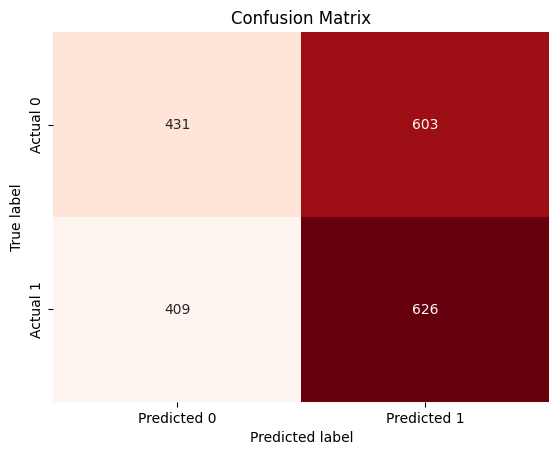

In [194]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_cnn1_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()